# Decision Tree from SKLearn

In [1906]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [1907]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', names=col_names)
pima = pima.drop(0, axis=0)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [1908]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [1909]:
pima.astype('float64')

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
764,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
765,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
766,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
767,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [1910]:
pima.glucose.iloc[0].isnumeric()

True

In [1911]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [1912]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(min_samples_split = 2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [1913]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


In [1914]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

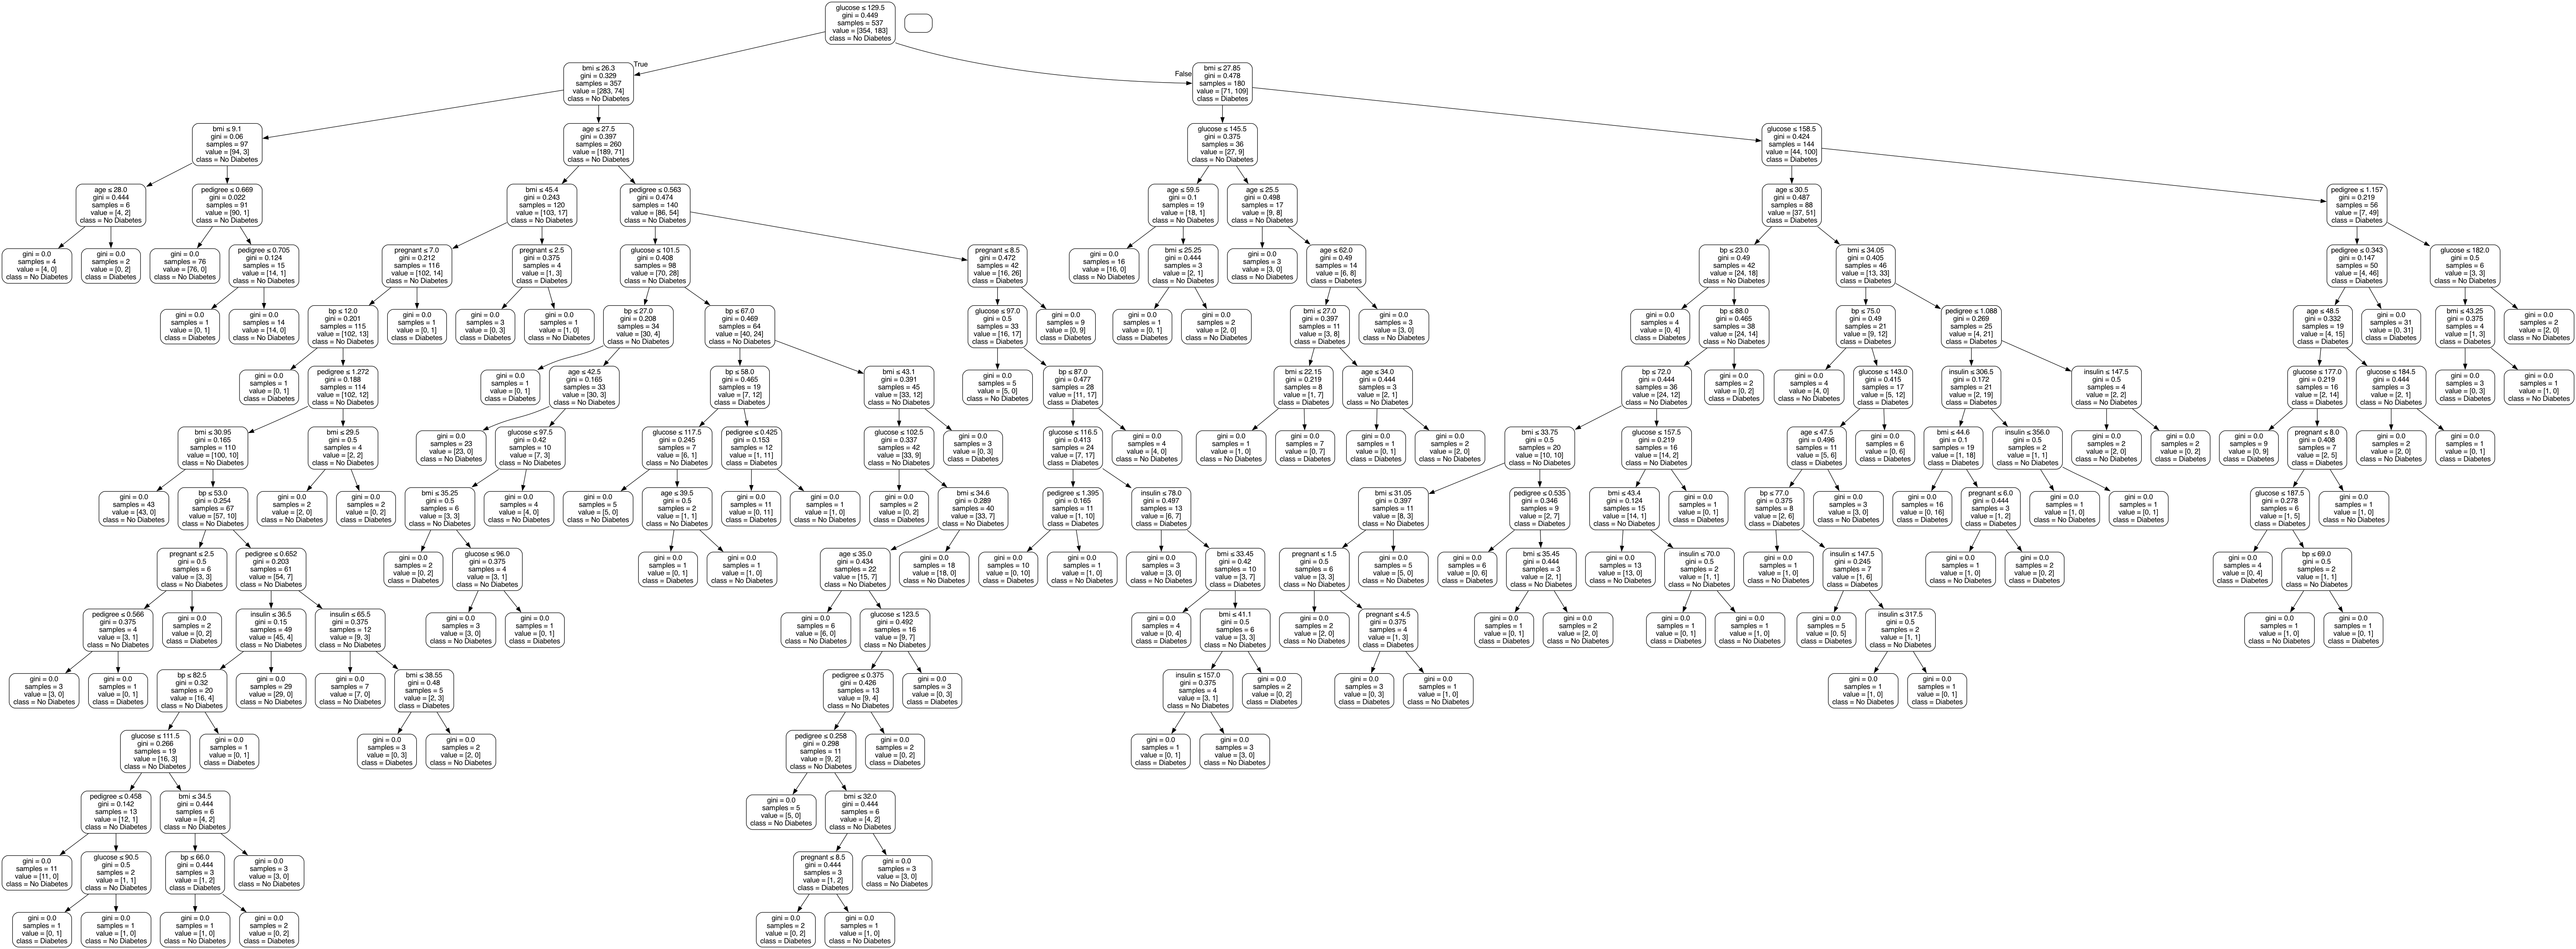

In [1915]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=False, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No Diabetes','Diabetes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Custom Decision Tree

In [1916]:
import time

In [1917]:
d = {'Loves Popcorn': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'], 'Loves Soda': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No'], 'Age': [7,12,18,35,38,50,83], 'Loves Cool As Ice': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No']}

In [1918]:
df = pd.DataFrame(data=d)

In [1919]:
df

,Loves Popcorn,Loves Soda,Age,Loves Cool As Ice
0,Yes,Yes,7,No
1,Yes,No,12,No
2,No,Yes,18,Yes
3,No,Yes,35,Yes
4,Yes,Yes,38,Yes
5,Yes,No,50,No
6,No,No,83,No


In [1920]:
def convertYesNoToBoolean(value):
    if value == 'Yes':
        return 1
    if value == 'No':
        return 0

In [1921]:
df['Loves Popcorn'] = df['Loves Popcorn'].apply(convertYesNoToBoolean)

In [1922]:
df['Loves Soda'] = df['Loves Soda'].apply(convertYesNoToBoolean)

In [1923]:
df['Loves Cool As Ice'] = df['Loves Cool As Ice'].apply(convertYesNoToBoolean)

In [1924]:
class Node: 
    """
    parameters: isRoot, isLeaf, condition, samples, values, parent, data
    """
    def __init__(self, isRoot, condition, samples, values, parent, data):
        self.isRoot = isRoot
        self.condition = condition
        self.data = data
        self.gini = None
        self.samples = samples
        self.values = values
        self.prediction = None
        self.parent = parent
        self.lChild = None
        self.rChild = None
        self.depth = 0
    
    def calculate_gini(self):
        if self.values == None:
            return 10
        elif self.isRoot:
            return 10
        else:
            if np.sum(self.values) == 0:
                return 10
            return 1 - np.square(self.values[0] / np.sum(self.values)) - np.square(self.values[1] / np.sum(self.values))    

In [1925]:
5*2

10

In [1926]:
class Tree: 
    """
    parameters: isRoot, isLeaf, condition, samples, values, parent, data
    """
    def __init__(self, maxDepth, minSamples):
        self.root = Node(True, None, None, None, None, None)
        self.depth = 0
        self.maxDepth = maxDepth
        self.minSamples = minSamples
        
    def buildTree(self, node, data, target):
        node.data = data
        node.samples = len(data)
        outputBestFeature = self.find_best_feature(node.data, target)
        nodeGini = node.calculate_gini()
#         print(nodeGini)
#         print("samples ", node.samples)
#         print("depth ", node.depth)
        if node.samples < self.minSamples:
#             print('min samples constraint not respected')
            node.isLeaf = True
            return
        elif node.depth == self.maxDepth:
#             print('max depth constraint not respected')
            node.isLeaf = True
            return
        if outputBestFeature[1] < nodeGini:
            condition = outputBestFeature[0]
#             print("condition: ", condition)
        else:
            node.isleaf = True
            return 
        if not type(condition) == tuple:
            if np.array_equal(data[condition], data[condition].astype(bool)):
                trueInstances = data[(data[condition] == 1)]
                falseInstances = data[(data[condition] ==  0)]
                trueNode = Node(False, None, len(trueInstances), [len((trueInstances[trueInstances[target] == 1])), len((trueInstances[trueInstances[target] == 0]))], node, trueInstances)
                trueNode.prediction = 1 if np.argmax(trueNode.values) == 0 else 0
                falseNode = Node(False, None, len(falseInstances), [len((falseInstances[falseInstances[target] == 1])), len((falseInstances[falseInstances[target] == 0]))], node, falseInstances)
                falseNode.prediction = 1 if np.argmax(falseNode.values) == 0 else 0
                node.values = np.array([trueNode.samples, falseNode.samples])
                node.prediction = 1 if np.argmax(node.values) == 0 else 0
                node.condition = condition
                node.lChild = trueNode
                node.rChild = falseNode
                node.lChild.depth = node.depth + 1
                node.rChild.depth = node.depth + 1
                self.buildTree(node.lChild, node.lChild.data, target)
                self.buildTree(node.rChild, node.rChild.data, target)
        else:
            trueInstances = data[data[condition[0]] < condition[1]]
            falseInstances = data[data[condition[0]] >= condition[1]]
            trueNode = Node(False, None, len(trueInstances), [len((trueInstances[trueInstances[target] == 1])), len((trueInstances[trueInstances[target] == 0]))], node, trueInstances)
            trueNode.prediction = 1 if np.argmax(trueNode.values) == 0 else 0
            falseNode = Node(False, None, len(falseInstances), [len((falseInstances[falseInstances[target] == 1])), len((falseInstances[falseInstances[target] == 0]))], node, falseInstances)
            falseNode.prediction = 1 if np.argmax(falseNode.values) == 0 else 0
            node.values = np.array([trueNode.samples, falseNode.samples])
            node.prediction = 1 if np.argmax(node.values) == 0 else 0
            node.condition = condition
            node.lChild = trueNode
            node.rChild = falseNode
            node.lChild.depth = node.depth + 1
            node.rChild.depth = node.depth + 1
            self.buildTree(node.lChild, node.lChild.data, target)
            self.buildTree(node.rChild, node.rChild.data, target)
        
        return self
    
    def predict(self, node, row):
        if node.lChild is None and node.rChild is None:
            return node.prediction
        if type(node.condition) == tuple:
            if(row[node.condition[0]] < node.condition[1]):
                return self.predict(node.lChild, row)
            else:
                return self.predict(node.rChild, row)
        else:
            if(row[node.condition] == 1):
                return self.predict(node.lChild, row)
            else:
                return self.predict(node.rChild, row)
        
    def predictDF(self, test):
        predictions = []
        for index, row in test.iterrows():
            predictions.append(self.predict(self.root, row))
        return predictions
            
    def calculate_consecutive_avgs(self, array):
        array = sorted(array)
        consecutiveAvgs = []
        for idx in range(0, len(array)):
            if idx+1 < len(array):
                consecutiveAvgs.append((array[idx] + array[idx+1]) / 2)
        return consecutiveAvgs
       
    def calculate_gini_for_feature(self, data, feature, target):
        array = np.array(data[feature])
        if not np.array_equal(array, array.astype(bool)):
            possibleConditions = self.calculate_consecutive_avgs(data[feature])
            possibleConditionsGinis = {}
            for condition in possibleConditions:
                trueInstances = data[data[feature] < condition]
                falseInstances = data[data[feature] >= condition]
                trueNode = Node(False, None, len(trueInstances), [len((trueInstances[trueInstances[target] == 1])), len((trueInstances[trueInstances[target] == 0]))], None, trueInstances)
                trueNodeGini = trueNode.calculate_gini()
                falseNode = Node(False, None, len(falseInstances), [len((falseInstances[falseInstances[target] == 1])), len((falseInstances[falseInstances[target] == 0]))], None, falseInstances)
                falseNodeGini = falseNode.calculate_gini()
                possibleConditionsGinis[condition] = (trueNode.samples / (trueNode.samples + falseNode.samples))*trueNodeGini + (falseNode.samples / (trueNode.samples + falseNode.samples))*falseNodeGini
            if len(possibleConditionsGinis) == 0:
                return 10
            return list({k: v for k, v in sorted(possibleConditionsGinis.items(), key=lambda item: item[1])}.items())[0]
        else:
            trueInstances = data[(data[feature] == 1)]
            falseInstances = data[(data[feature] ==  0)]
            trueNode = Node(False, None, len(trueInstances), [len((trueInstances[trueInstances[target] == 1])), len((trueInstances[trueInstances[target] == 0]))], None, trueInstances)
            trueNodeGini = trueNode.calculate_gini()
            falseNode = Node(False, None, len(falseInstances), [len((falseInstances[falseInstances[target] == 1])), len((falseInstances[falseInstances[target] == 0]))], None, falseInstances)
            falseNodeGini = falseNode.calculate_gini()
            return (trueNode.samples / (trueNode.samples + falseNode.samples))*trueNodeGini + (falseNode.samples / (trueNode.samples + falseNode.samples))*falseNodeGini

    def find_best_feature(self, data, target):
        bestFeature = np.inf
        lowestGini = np.inf
        for column in data.columns:
            if column == target:
                continue
            gini = self.calculate_gini_for_feature(data, column, target)
            if type(gini) == tuple:
                if gini[1] < lowestGini:
                    lowestGini = gini[1]
                    bestFeature = (column, gini[0])
                continue
            if gini < lowestGini:
                lowestGini = gini
                bestFeature = column
            else:
                lowestGini = gini
                bestFeature = column
        return bestFeature, lowestGini

In [1927]:
X_train['label'] = y_train

In [1928]:
X_train = X_train.astype('float64')
X_train

,pregnant,insulin,bmi,age,glucose,bp,pedigree,label
89,15.0,110.0,37.1,43.0,136.0,70.0,0.153,1.0
468,0.0,100.0,36.8,25.0,97.0,64.0,0.600,0.0
551,1.0,0.0,27.4,21.0,116.0,70.0,0.204,0.0
148,2.0,119.0,30.5,34.0,106.0,64.0,1.400,0.0
482,0.0,0.0,35.2,29.0,123.0,88.0,0.197,0.0
...,...,...,...,...,...,...,...,...
646,2.0,440.0,39.4,30.0,157.0,74.0,0.134,0.0
716,7.0,392.0,33.9,34.0,187.0,50.0,0.826,1.0
73,13.0,0.0,43.4,42.0,126.0,90.0,0.583,1.0
236,4.0,0.0,43.6,26.0,171.0,72.0,0.479,1.0


In [1929]:
diabetesTree = Tree(None, 2)

In [1930]:
st = time.time()
diabetesTree = diabetesTree.buildTree(diabetesTree.root, X_train, 'label')
et = time.time()
elapsed_time = et-st
print("Execution time:", elapsed_time, 'seconds')

Execution time: 38.627896785736084 seconds


In [1931]:
X_test = X_test.astype('float64')
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
286,7.0,135.0,26.0,51.0,136.0,74.0,0.647
102,1.0,0.0,26.1,22.0,151.0,60.0,0.179
582,6.0,0.0,25.0,27.0,109.0,60.0,0.206
353,3.0,0.0,34.4,46.0,61.0,82.0,0.243
727,1.0,180.0,36.1,25.0,116.0,78.0,0.496
...,...,...,...,...,...,...,...
242,4.0,88.0,33.1,22.0,91.0,70.0,0.446
600,1.0,120.0,23.1,26.0,109.0,38.0,0.407
651,1.0,100.0,25.2,23.0,91.0,54.0,0.234
12,10.0,0.0,38.0,34.0,168.0,74.0,0.537


In [1932]:
y_test = y_test.astype('float64')
y_test

286    0.0
102    0.0
582    0.0
353    0.0
727    0.0
      ... 
242    0.0
600    0.0
651    0.0
12     1.0
215    1.0
Name: label, Length: 231, dtype: float64

In [1933]:
y_pred = diabetesTree.predictDF(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


In [1934]:
y_pred

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0]

In [1935]:
y_test

286    0.0
102    0.0
582    0.0
353    0.0
727    0.0
      ... 
242    0.0
600    0.0
651    0.0
12     1.0
215    1.0
Name: label, Length: 231, dtype: float64